# Task 1

In [127]:
import numpy as np

In [25]:
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

np.random.seed(13)

X_stretched = np.dot(X, np.random.randn(2, 2))
x = X_stretched.T[0]
y = X_stretched.T[1]

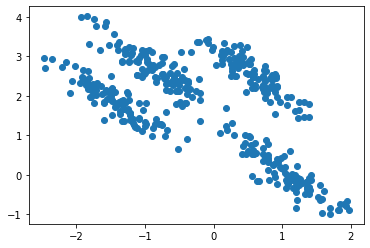

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [132]:
from scipy.stats import chi2
from scipy import linalg
from matplotlib.patches import Ellipse

chi2.ppf(0.95, 2)
def plot_ellipse(means, cov, ax, conf, colors):
    n = means.shape[0]
    for i in range(n):
        v, w = linalg.eigh(cov[i])
        s = chi2.ppf(conf, 2)
        v[0] = 2 * np.sqrt(s * v[0])
        v[1] = 2 * np.sqrt(s * v[1])
        u = w[0] / linalg.norm(w[0])
        if u[0] == 0:
            angle = 90
        else:
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
        ell = Ellipse(means[i], v[0], v[1], 180. + angle)
        ell.set(color=colors[i], alpha=(1-conf) * 0.8)
        ax.add_artist(ell)
        

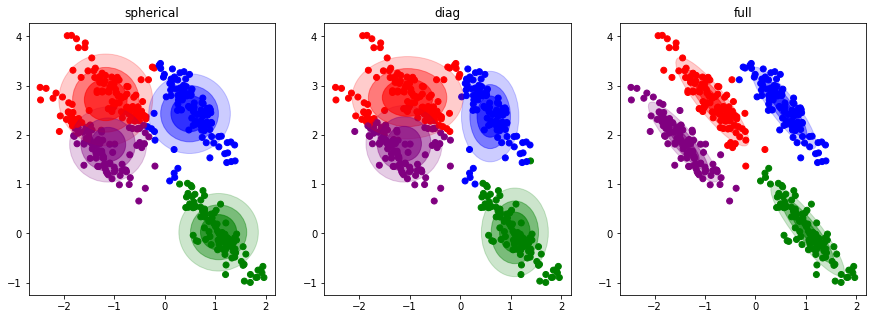

In [136]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap

types = ['spherical', 'diag', 'full']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['red', 'green', 'blue', 'purple']
for i in range(3):
    model = GaussianMixture(n_components=4, covariance_type=types[i], random_state=11)
    model.fit(X_stretched)
    cov = model.covariances_
    if i == 0:
        cov = np.array(list(map(lambda x: np.diagflat([x, x]), cov)))
    if i == 1:
        cov = np.array(list(map(np.diagflat, cov)))

    means = model.means_
    res = model.predict(X_stretched)
    axes[i].scatter(x, y, c = res, cmap=ListedColormap(colors))
    axes[i].set_title(types[i])
    plot_ellipse(means, cov, axes[i], 0.75, colors)
    plot_ellipse(means, cov, axes[i], 0.5, colors)
    plot_ellipse(means, cov, axes[i], 0.25, colors)
    

# Task 2

In [146]:
from sklearn.datasets import load_digits

digits = load_digits()

In [147]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

#data = pca.fit_transform(digits.data)
data = digits.data

Using silhouette score to choose the best number of components for mixture:

In [240]:
from sklearn import metrics
scores = [0.0 for i in range(50)]
for i in range(2, 50):
    model = GaussianMixture(n_components=i, covariance_type='full', random_state=11)
    model.fit(data)
    preds = model.predict(data)
    scores[i] = metrics.silhouette_score(data, preds)

max score for n = 9


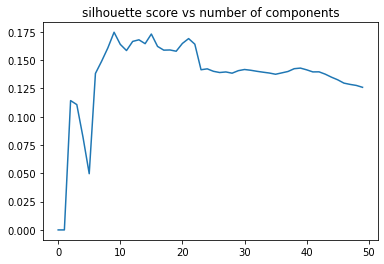

In [241]:
plt.plot(scores)
plt.title('silhouette score vs number of components')
print('max score for n = ' + str(np.argmax(scores)))

In [243]:
model = GaussianMixture(n_components=np.argmax(scores), covariance_type='full')
model.fit(data)
generated=model.sample(100)

In [264]:
def plot_images(images, n_row, n_col, title):
    fig, axes = plt.subplots(n_row, n_col, figsize=(1.5*n_col,2*n_row))
    for i in range(n_row * n_col):
        ax = axes[i//n_col, i%n_col]
        ax.imshow(images[i].reshape(8, 8), cmap='gray')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

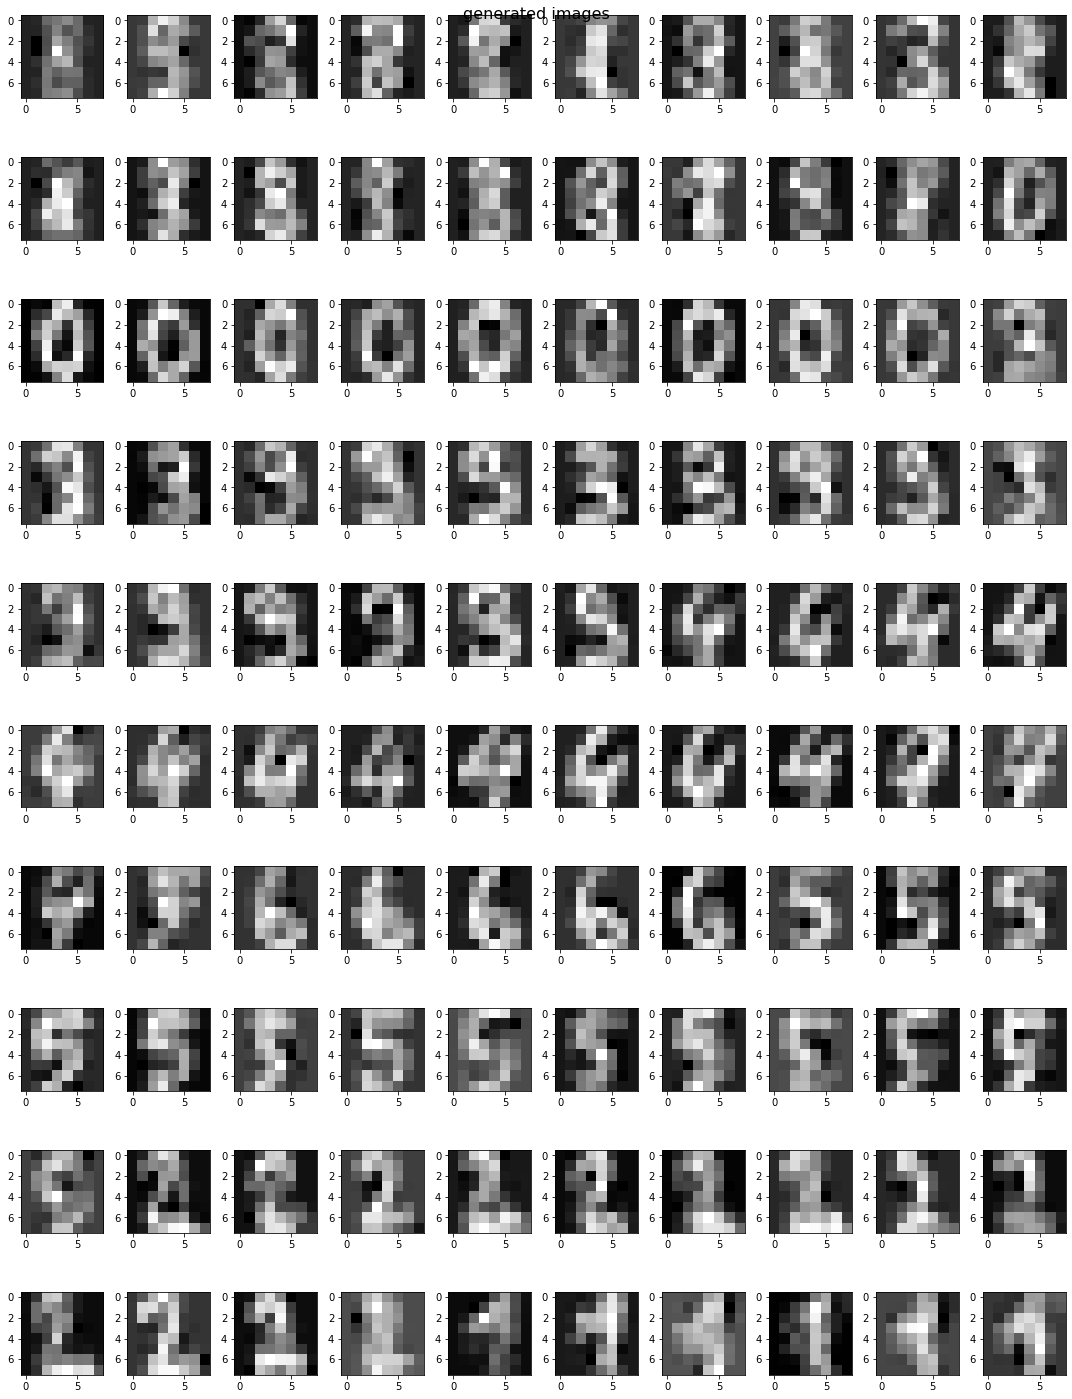

In [265]:
plot_images(generated[0], 10, 10, 'generated images')

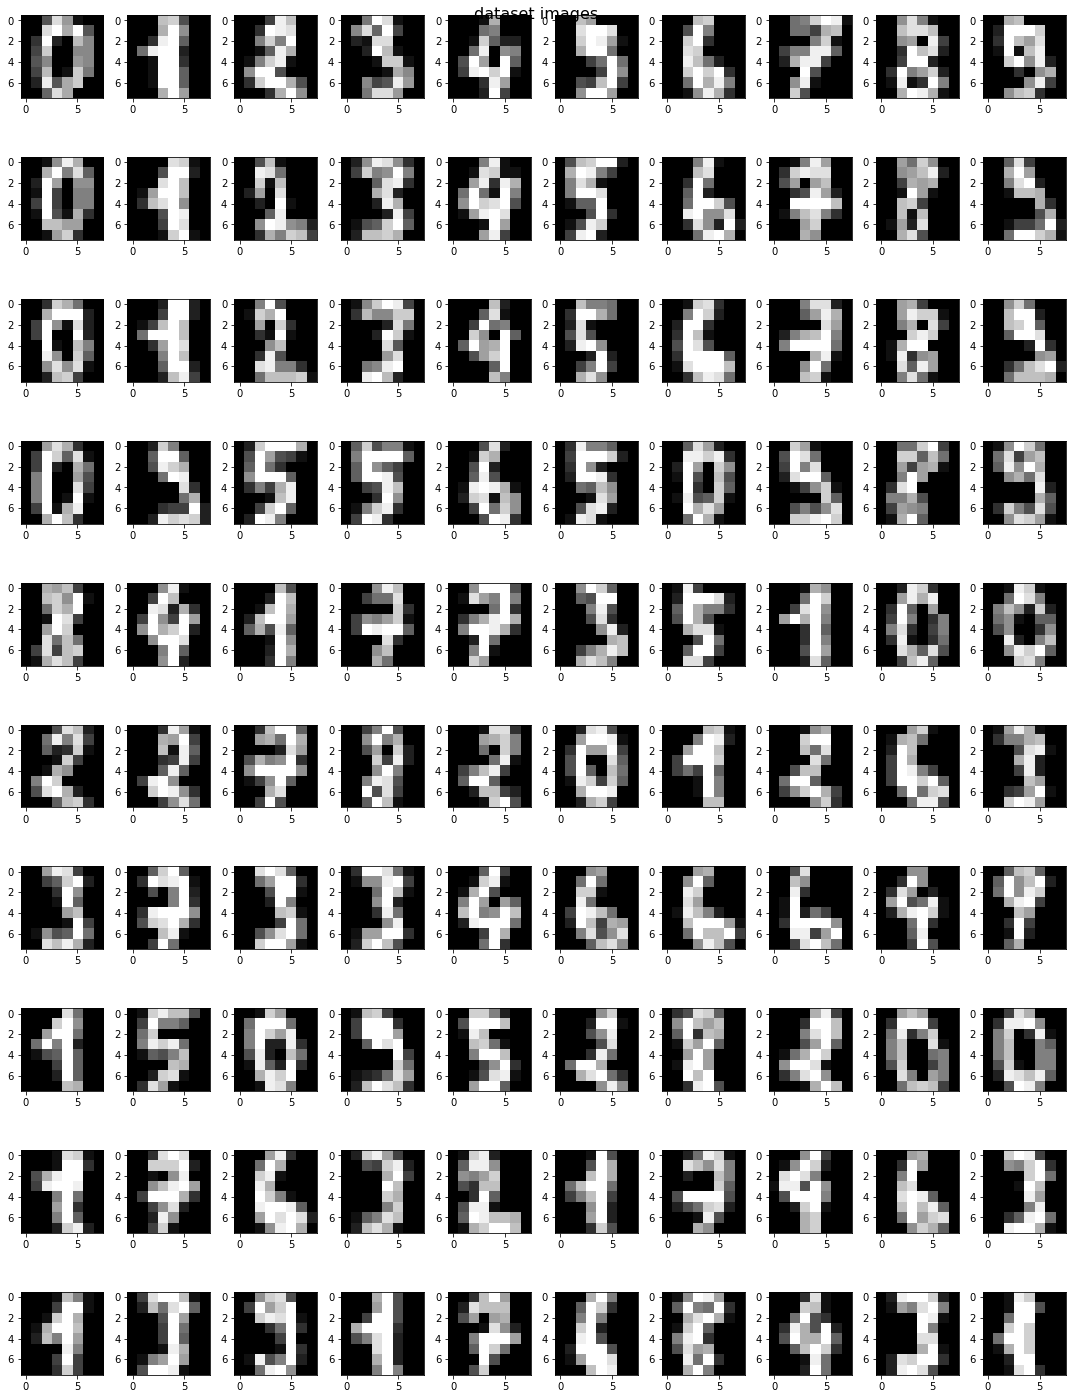

In [266]:
plot_images(data[:100], 10, 10, 'dataset images')